In [ ]:
import os
os.listdir('/content')



['.config', 'gojekreview.csv', 'sample_data']

In [ ]:
import pandas as pd

data = pd.read_csv('gojekreview.csv')
data.head()

data.info()

data = data.dropna()

def label_sentiment(score):
    if score >= 4:
        return 'positive'
    elif score == 3:
        return 'neutral'
    else:
        return 'negative'

data['sentiment'] = data['score'].apply(label_sentiment)

data.isnull().sum()

X = data['content']
y = data['sentiment']






<class 'pandas.core.frame.DataFrame'>
RangeIndex: 225002 entries, 0 to 225001
Data columns (total 5 columns):
 #   Column      Non-Null Count   Dtype 
---  ------      --------------   ----- 
 0   userName    225002 non-null  object
 1   content     225000 non-null  object
 2   score       225002 non-null  int64 
 3   at          225002 non-null  object
 4   appVersion  225002 non-null  object
dtypes: int64(1), object(4)
memory usage: 8.6+ MB


In [ ]:
data = data.dropna()


In [ ]:
def label_sentiment(score):
    if score >= 4:
        return 'positive'
    elif score == 3:
        return 'neutral'
    else:
        return 'negative'

data['sentiment'] = data['score'].apply(label_sentiment)


In [ ]:
data['sentiment'].value_counts()


,count
sentiment,
positive,161369
negative,54171
neutral,9460


In [ ]:
X = data['content']
y = data['sentiment']


In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer

tfidf = TfidfVectorizer(
    max_features=5000,
    stop_words='english'
)

X_tfidf = tfidf.fit_transform(X)


In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X_tfidf, y, test_size=0.2, random_state=42
)


In [ ]:
from sklearn.naive_bayes import MultinomialNB

model = MultinomialNB()
model.fit(X_train, y_train)


MultinomialNB()

In [ ]:
from sklearn.metrics import accuracy_score, classification_report

y_pred = model.predict(X_test)

print("Accuracy:", accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))


Accuracy: 0.8830888888888889
              precision    recall  f1-score   support

    negative       0.73      0.91      0.81     10870
     neutral       0.42      0.00      0.01      1855
    positive       0.95      0.93      0.94     32275

    accuracy                           0.88     45000
   macro avg       0.70      0.61      0.58     45000
weighted avg       0.87      0.88      0.87     45000



In [ ]:
import pandas as pd

data = pd.read_csv('gojekreview.csv')
data.head()


,userName,content,score,at,appVersion
0,Yuga Edit,akun gopay saya di blok,1.0,2022-01-21 10:52:12,4.9.3
1,ff burik,Lambat sekali sekarang ini bosssku apk gojek g...,3.0,2021-11-30 15:40:38,4.9.3
2,Anisa Suci Rahmayuliani,Kenapa sih dari kemarin sy buka aplikasi gojek...,4.0,2021-11-29 22:58:12,4.9.3
3,naoki yakuza,Baru download gojek dan hape baru trus ditop u...,1.0,2022-09-03 15:21:17,4.9.3
4,Trio Sugianto,Mantap,5.0,2022-01-15 10:05:27,4.9.3


In [ ]:
data.columns



Index(['userName', 'content', 'score', 'at', 'appVersion'], dtype='object')

In [ ]:
def label_sentiment(score):
    if score >= 4:
        return 'positive'
    elif score == 3:
        return 'neutral'
    else:
        return 'negative'

data['sentiment'] = data['score'].apply(label_sentiment)


In [ ]:
data['sentiment'].value_counts()


,count
sentiment,
positive,32030
negative,15527
neutral,2231


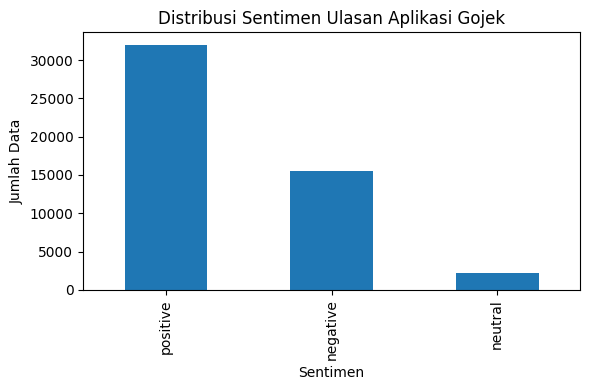

In [ ]:
import matplotlib.pyplot as plt

sentiment_counts = data['sentiment'].value_counts()

plt.figure(figsize=(6,4))
sentiment_counts.plot(kind='bar')
plt.title('Distribusi Sentimen Ulasan Aplikasi Gojek')
plt.xlabel('Sentimen')
plt.ylabel('Jumlah Data')
plt.tight_layout()
plt.show()
